In [6]:
import pandas as pd 
import numpy as np

Read Data

In [41]:
df=pd.read_csv('/content/BBC News.csv')
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [42]:
df.shape

(1490, 3)

Verifying null values

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

#understanding the output class distribution
the classes are almost balanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


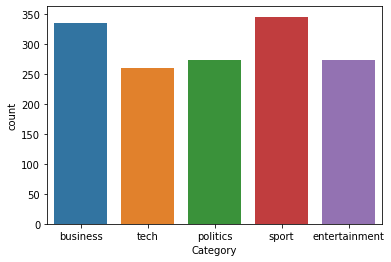

In [45]:
sns.countplot(df['Category'])

importing libraries

In [46]:
from nltk.stem.porter import PorterStemmer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

tokenising the news data and zero padding to the fixed size 

In [47]:
n_most_common_words = 8000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
sequences = tokenizer.texts_to_sequences(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 24983 unique tokens.


verifying th tokenised output and zero padding 

In [73]:
print(len(sequences))
print(len(sequences[0]))
print(len(X))
print(len(X[0]))

1490
292
1490
130


label Encoding the output column

In [51]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
lables= label_encoder.fit_transform(df['Category'])

In [52]:
lables

array([0, 0, 0, ..., 0, 4, 4])

creating the output column to 5 dimesional vector

In [54]:
labels = to_categorical(lables, num_classes=5)

In [55]:
labels

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

splitting data to train and test for proper evaluaton

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.25, random_state=42)

verifying the split

In [57]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

((1117, 130), (1117, 5), (373, 130), (373, 5))


defining the training paramters

In [58]:
epochs = 50
emb_dim = 128
batch_size = 64

creating the model

In [59]:
model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(5, activation='softmax'))

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 130, 128)          1024000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 130, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 1,073,733
Trainable params: 1,073,733
Non-trainable params: 0
_________________________________________________________________
None


training the model

In [61]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/50
14/14 [==============================] - 9s 411ms/step - loss: 1.6091 - acc: 0.2161 - val_loss: 1.6037 - val_acc: 0.2411
Epoch 2/50
14/14 [==============================] - 5s 339ms/step - loss: 1.5990 - acc: 0.2632 - val_loss: 1.5981 - val_acc: 0.2589
Epoch 3/50
14/14 [==============================] - 5s 344ms/step - loss: 1.5917 - acc: 0.2990 - val_loss: 1.5901 - val_acc: 0.2723
Epoch 4/50
14/14 [==============================] - 5s 327ms/step - loss: 1.5739 - acc: 0.3046 - val_loss: 1.5688 - val_acc: 0.2411
Epoch 5/50
14/14 [==============================] - 5s 325ms/step - loss: 1.5222 - acc: 0.3225 - val_loss: 1.5252 - val_acc: 0.3214
Epoch 6/50
14/14 [==============================] - 5s 330ms/step - loss: 1.3472 - acc: 0.4345 - val_loss: 1.2334 - val_acc: 0.4330
Epoch 7/50
14/14 [==============================] - 5s 325ms/step - loss: 1.2169 - acc: 0.4401 - val_loss: 1.0964 - val_acc: 0.4598
Epoch 8/50
14/14 [==============================] - 5s 336ms/step - loss: 1.

evaluating the model on test data

In [62]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

12/12 [==============================] - 1s 46ms/step - loss: 0.4588 - acc: 0.9196
Test set
  Loss: 0.459
  Accuracy: 0.920


In [63]:
pred = model.predict(X_test)

12/12 [==============================] - 1s 58ms/step


converting the output data back to one dimension

In [70]:
pred_cat = np.argmax(pred, axis=-1)
test_cat = np.argmax(y_test, axis=-1)

Comparing the visualisation of both of the test and train data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


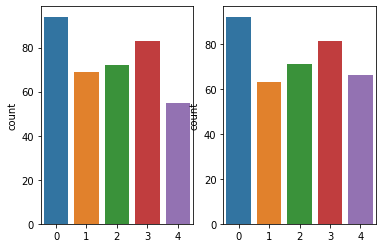

In [72]:
plt.subplot(1,2,1)
sns.countplot(pred_cat)
plt.subplot(1,2,2)
sns.countplot(test_cat)